## 2. Data Cleaning and Preparation

This notebook focuses on preparing the Emergency Room dataset for analysis.  
The objective is to improve data quality, remove inconsistencies, handle missing values,  
apply privacy protections, and format attributes appropriately to support later steps such as  
statistical analysis, modelling, and dashboard visualisation.

While exploratory inspection was performed in Notebook 1, this file executes all cleaning  
operations so that it can run independently as a standalone workflow.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH = "../data/emergency_room.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


### Removing Personally Identifiable Information (PII)

Patient name fields are removed to ensure privacy protection
and ethical handling of healthcare data.

In [3]:
df = df.drop(columns=["Patient First Inital", "Patient Last Name"])
df.head()

,Patient Id,Patient Admission Date,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,M,5,African American,Orthopedics,False,NaN,10,0


### Converting Admission Date to Datetime Format

The Patient Admission Date field was converted into a datetime type  
to support future temporal analysis such as admission trends over time  
(e.g., daily, monthly, or seasonal patterns).

In [4]:
df["Patient Admission Date"] = pd.to_datetime(df["Patient Admission Date"], errors="coerce")
df["Patient Admission Date"].head()

C:\Users\ABDUL\AppData\Local\Temp\ipykernel_2312\1080717916.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Patient Admission Date"] = pd.to_datetime(df["Patient Admission Date"], errors="coerce")


0   2024-03-20 08:47:00
1   2024-06-15 11:29:00
2   2024-06-20 09:13:00
3   2024-02-04 22:34:00
4   2024-09-04 17:48:00
Name: Patient Admission Date, dtype: datetime64[ns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Patient Id                  9216 non-null   object        
 1   Patient Admission Date      9216 non-null   datetime64[ns]
 2   Patient Gender              9216 non-null   object        
 3   Patient Age                 9216 non-null   int64         
 4   Patient Race                9216 non-null   object        
 5   Department Referral         3816 non-null   object        
 6   Patient Admission Flag      9216 non-null   bool          
 7   Patient Satisfaction Score  2517 non-null   float64       
 8   Patient Waittime            9216 non-null   int64         
 9   Patients CM                 9216 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 657.1+ KB


### Re-checking Missing Values as Part of the Cleaning Workflow

Although missing values were initially observed in the data overview notebook,  
the audit is repeated here because this notebook performs independent cleaning steps.  
Understanding which columns contain missing data is essential before applying  
imputation, exclusion, or feature selection strategies.

In [6]:
df.isnull().sum()

Patient Id                       0
Patient Admission Date           0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral           5400
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
Patients CM                      0
dtype: int64

In [7]:
df["Department Referral"] = df["Department Referral"].fillna("Unknown")

In [8]:
df = df.drop(columns=["Patient Satisfaction Score"])

### Handling Missing Values

Two fields in the dataset showed substantial missingness:

- *Department Referral* (≈ 58% missing)
- *Patient Satisfaction Score* (≈ 73% missing)

Referral values were imputed using "Unknown" to preserve its categorical structure  
while maintaining all records.

Because Satisfaction Score had extremely high missingness, it was removed.  
Imputing such a large proportion risked introducing bias, and the field was not  
suitable for downstream modelling. This decision improves overall data reliability  
and model validity.

### Cleaning Invalid Age Values

A range validity check was performed on patient age to remove  
impossible entries (e.g., below 0 or above 110).  
Ensuring realistic values improves analytical reliability  
and avoids distortion in statistical summaries and modelling.

In [9]:
# Remove impossible ages
df = df[(df["Patient Age"] > 0) & (df["Patient Age"] < 110)]

df["Patient Age"].describe()

count    9216.000000
mean       39.855143
std        22.755125
min         1.000000
25%        20.000000
50%        39.000000
75%        60.000000
max        79.000000
Name: Patient Age, dtype: float64

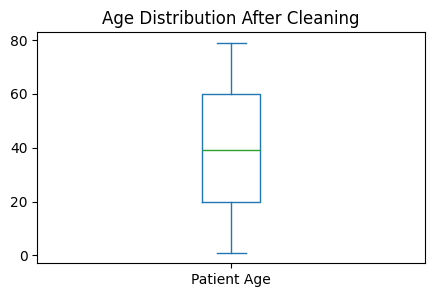

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
df["Patient Age"].plot(kind="box")
plt.title("Age Distribution After Cleaning")
plt.show()

### Age Distribution Check

A boxplot was used to visually validate that  
no extreme age outliers remain after cleaning.

### Cleaning Waiting Time Values

Waiting time must be non-negative in a real ER context.  
A validity check was applied to ensure all durations  
were zero or greater, removing any erroneous records.

In [11]:
df = df[df["Patient Waittime"] >= 0]
df["Patient Waittime"].describe()

count    9216.000000
mean       35.259874
std        14.735323
min        10.000000
25%        23.000000
50%        35.000000
75%        48.000000
max        60.000000
Name: Patient Waittime, dtype: float64

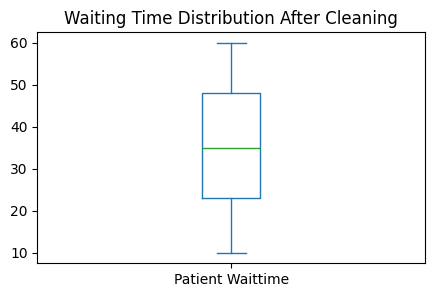

In [12]:
plt.figure(figsize=(5,3))
df["Patient Waittime"].plot(kind="box")
plt.title("Waiting Time Distribution After Cleaning")
plt.show()

### Waiting Time Outlier Check

A second diagnostic boxplot was used to verify  
that waiting times fall within a reasonable range.

In [14]:
df.to_csv("../data/cleaned_emergency_room.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
